# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [5]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


## (1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

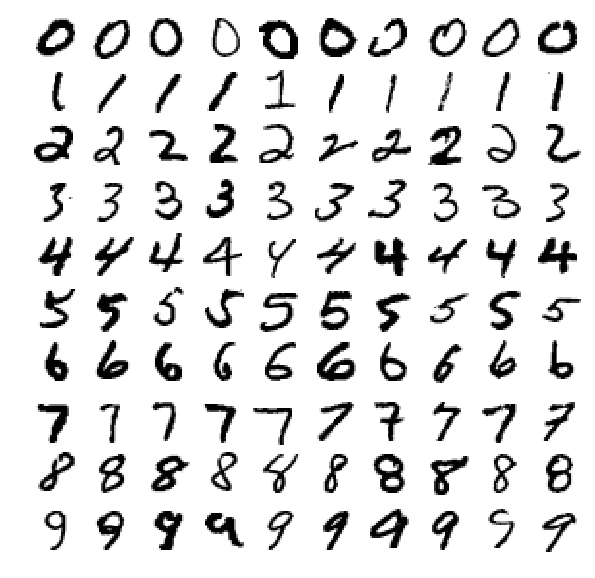

In [61]:
def P1(num_examples=10):
    ### STUDENT START ###
    #Converts Data to Dataframe for workability
    df = pd.DataFrame(mini_train_data)
    colNames = df.columns 
    df['Target'] = mini_train_labels 
    #Creates Plot
    fig,ax = plt.subplots(10,num_examples,figsize=(10,10),sharex=True,sharey=True)
    #Loops through each digit
    for i in range(10):
        #Selects a random sample of num_examples
        sample = df[df['Target'] == i].sample(num_examples).reset_index(drop=True)
        #Loops through the sample and plots the data
        for j in sample.index:
            #Reshapes the array to a 28x28 Matrix and plots these array values as an image. 
            #We use the black on white color map
            ax[i,j].imshow(sample[columns].iloc[j,:].as_matrix().reshape((28,28)),cmap='gray_r')
            ax[i,j].axis('off')
            ax[i,j].set_aspect('equal')
    #Eliminates white space between subplots
    plt.subplots_adjust(wspace=0, hspace=0)
    ### STUDENT END ###

P1(10)


## (2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [60]:
def P2(k_values):
    ### STUDENT START ###
    #Loop through the list of K_Values
    for k in k_values:
        #Sets the K-Nearest Neighbors Clasifier for a given K
        KNC = KNeighborsClassifier(n_neighbors=k)
        #Trains the model
        KNC.fit(mini_train_data,mini_train_labels)
        #Only for k = 1 show precision, recall, and F1 for each label
        if k == 1:
            print('Where K == %s:\n'%k)
            #Calculcated Predicted values
            predicted = KNC.predict(dev_data)
            #Prepares classification report for actual vs. predicted
            print(classification_report(dev_labels,predicted))
        #For all values of K, show the accuracy  
        print ("Accuracy for k = {} is {:.2f}%.".format(k, KNC.score(dev_data,dev_labels)*100))
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Where K == 1:

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy for k = 1 is 88.80%.
Accuracy for k = 3 is 87.80%.
Accuracy for k = 5 is 86.90%.
Accuracy for k = 7 is 86.50%.
Accuracy for k = 9 is 86.30%.


### ANSWER:
For our K-Nearest-Neighbors model where K = 1, the hardest digit to predict is <b>9</b>. We say that 9 is the hardest digit to predict because it has the lowest F<sub>1</sub> score of 0.80. The F<sub>1</sub> score<sup>1</sup> is the harmonic mean of of precision and recall, where precision is the $\frac{True \ Positive}{True \ Positives+False \ Positives}$ and recall is $\frac{True \ Positives}{True\ Positives + False \ Negatives}$ .

1. https://en.wikipedia.org/wiki/F1_score

## (3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [96]:
def P3(train_sizes, accuracies):
    ### STUDENT START ###
    #Build K-Nearest-Neighbors Classifier where K = 1
    KNC = KNeighborsClassifier(n_neighbors=1)
    for size in train_sizes:
        #Sets Start Time for Timing
        start = time.time()
        #Converts train_data to datframe for workability
        sample = pd.DataFrame(train_data).sample(size)
        #Gets the Training Labels for the sample
        sample_labels = pd.DataFrame(train_labels).iloc[sample.index,:]
        #Trains the Model
        KNC.fit(sample, sample_labels.values.ravel())
        
        score = KNC.score(dev_data, dev_labels)*100
        accuracies.append(score/100)
        end = time.time()
        print("Sample Size: {0:5d}; Accuracy: {1:.2f}%; Time: {2:4.2f}".format(size,score,end-start))
    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Sample Size:   100; Accuracy: 72.10%; Time: 0.11
Sample Size:   200; Accuracy: 78.30%; Time: 0.21
Sample Size:   400; Accuracy: 84.80%; Time: 0.41
Sample Size:   800; Accuracy: 86.80%; Time: 0.81
Sample Size:  1600; Accuracy: 91.40%; Time: 1.62
Sample Size:  3200; Accuracy: 92.70%; Time: 3.28
Sample Size:  6400; Accuracy: 94.20%; Time: 6.90
Sample Size: 12800; Accuracy: 95.30%; Time: 14.02
Sample Size: 25000; Accuracy: 96.70%; Time: 30.88


## (4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [8]:
def P4(n=60000):
    ### STUDENT START ###
    LR =  LinearRegression()
    LR.fit(train_sizes,accuracies)
    LR =  LinearRegression()
    LR.fit(np.array(train_sizes).reshape(9,1),np.array(accuracies).reshape(9,1))
    LR.predict(60000).tolist()[0]
    ### STUDENT END ###

#P4()

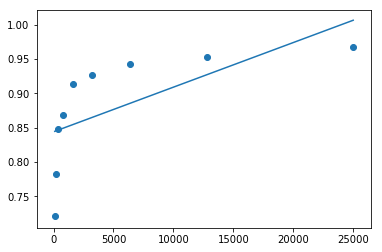

In [105]:
plt.plot(np.array(train_sizes).reshape(9,1),LR.predict(np.array(train_sizes).reshape(9,1)))
plt.scatter(np.array(train_sizes).reshape(9,1),np.array(accuracies).reshape(9,1))

ANSWER:

## (5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

 Confusion Matrix - Row: Actual Value; Column: Predicted Value 

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

The most commonly confused digit pairing is 4 and 9, with this occuring 23 times.

The below is a sample of 4s that have been misrepresented as 9s


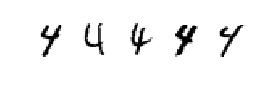


The below is a sample of 9s that have been misrepresented as 4s


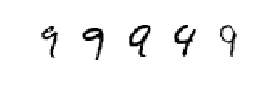

In [404]:
### STUDENT START ###
def find_max(CM):
    """
        Input: Confusion_matrix (List of Lists)
        Ouput:
            Row as int: Actual Value
            Column at int: Predicted Value
            Value as int: Number of times the actual value takes this incorrect predicted value
            
        Function: Takes in a confusion matrix and finds the most frequently misreprented digit
    """
    Max = 0
    index_i = 0
    index_j = 0
    #Loops through the list of lists
    for i in range(0,CM.shape[0]):
        for j in range(i,CM.shape[1]):
            #Checks that the row and column are not equal, because those are accurate predictions
            if i <> j:
                #If the current[row][column]+current[column][row] is greater than our current max, update the Max and indicies
                if (CM[i][j]+CM[j][i]) > Max:
                    Max = CM[i][j]+CM[j][i]
                    index_i = i
                    index_j = j
                    
    return index_i,index_j,Max

def simple_plot(sample):
    """
        Input: Sample as DataFrame
    
        Function: Plots the sample data
    """
    #Creates Plot
    fig,ax = plt.subplots(1,5,figsize=(4,1),sharex=True,sharey=True)
    #Loops through the sample and plots the data
    for j in sample.index:
        #Reshapes the array to a 28x28 Matrix and plots these array values as an image. 
        #We use the black on white color map
        ax[j].imshow(sample.iloc[j].as_matrix().reshape((28,28)),cmap='gray_r')
        ax[j].axis('off')
        ax[j].set_aspect('equal')
    #Eliminates white space between subplots
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
  
    
def P5():
    #Builds Nearest Neighbor Model with 1 Neighbor
    KNC = KNeighborsClassifier(n_neighbors=1)
    #Trains the model
    KNC.fit(mini_train_data,mini_train_labels)

    #Calculcated Predicted values
    predicted = KNC.predict(dev_data)
    CM = confusion_matrix(dev_labels,predicted)
    print('\033[1m Confusion Matrix - Row: Actual Value; Column: Predicted Value \033[0m\n')
    print(CM)
    
    #Find the Pair where X is most X is most commonly confused to be Y, and Y is most commonly confused to be X
    row, column, value = find_max(CM)
    print('\n\033[1mThe most commonly confused digit pairing is {} and {}, with this occuring {} times.'.format(row,column,value))
    
    #Select a Sample of 5 Values where X is predicted to be Y
    samples1 = pd.DataFrame(dev_data).iloc[(dev_labels == row) & (predicted == column)].sample(5).reset_index(drop=True)
    print('\n\033[1mThe below is a sample of {}s that have been misrepresented as {}s'.format(row,column))
    #Plot these Samples
    simple_plot(samples1)
    
    #Select a Sample of 5 Values where Y is predicted to be X
    samples2 = pd.DataFrame(dev_data).iloc[(dev_labels == column) & (predicted == row)].sample(5).reset_index(drop=True)
    print('\n\033[1mThe below is a sample of {}s that have been misrepresented as {}s'.format(column,row))
    #Plot these Samples
    simple_plot(samples2)
    ### STUDENT END ###

P5()

## (6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [540]:
### STUDENT START ###
def get_point_blur(matrix,std, i, j):
    """
        Inputs: 
            Matrix: (x,y) numpy array
            Standard Deviation: Float or Int. Represents Standard Deviation to use in Gaussian Function
            I: Int. Reprents Row Value. Used with J to detmined Point to apply blur function to.
            J: Int. Reprents Column Value.  Used with I to detmined Point to apply blur function to.
            
        Output: Blur Value for Point (i,j)
        
        Function: Finds the the 3x3 Matrix Containing the origin (i,j) and the surrounding pixels. It then uses 
        the two-dimension Gaussian Function(1) to calculate the transfromation to apply to each pixel. It then 
        returns the sum of the Gaussian Function for all points in the matrix to represent the adjusted point value.
        
        (1): https://en.wikipedia.org/wiki/Gaussian_blur
    """
    sumPoint = 0
    #Get Prior Row (if current row is not 0); Current Row; Next Row (if current row is not 27)
    for x in range(max(0, i-1), min(i+2,28)):
        #Get Prior Row (if current row is not 0); Current Row; Next Row (if current row is not 27)
        for y in range(max(0, j-1),min(j+2,28)):
            #
            sumPoint += (1/(2*np.pi*std**2))*np.e**(-((x-i)**2+(y-j)**2)/(2*std**2))*matrix[x,y]
    return sumPoint

def blur_matrix(matrix,std=1):
    """
        Inputs:
            Matrix: flat numpy array, which we will reshape
            Standard Deviation: Float or Int. Represents Standard Deviation to use in Gaussian Function. Default is 1
        Outputs:
            Blurred_matrix: Flat Numpy array representing the matrix array following a blurring adjustment.
    """
    #Converts the 1x784 array to 28x28 Matrix 
    matrix = np.array(matrix).reshape((28,28))
    #Creates a matching zeros matrix
    blurred_image = np.zeros((28,28))
    #Loop through rows
    for x in range(0,matrix.shape[0]):
        #Loop through columns
        for y in range(0,matrix.shape[0]):
            #Assigns the blur value to this point
            blurred_image[x,y] = get_point_blur(matrix,std, x, y)
    #Returns the blur array         
    return blurred_image.flatten()

def blur_entire_dataset(data):
    """
        Inputs: Data. Numpy Array. This is the data to be blurred.
        Outputs: 
            Blurred Array: Numpy Array. 
                This is the data array after a blur function has been applied to each element of the array
    """
    #Creates a Blur Array Matching the size of the dataset
    blurred_data = np.zeros(data.shape)
    #For each row get the blur data
    for i in range(blurred_data.shape[0]):
        blurred_data[i] = blur_matrix(data[i])
    return blurred_data

#Applies the blurring to the two datasets to save time later
blurred_train_data = blur_entire_dataset(mini_train_data)
blurred_dev_data = blur_entire_dataset(dev_data)
### STUDENT END ###

In [543]:
def P6(): 
    ### STUDENT START ###
    Scenarios = {0:{'Name':'No Blur Adjustment',
                    'Data':(mini_train_data,mini_train_labels,dev_data,dev_labels)},
                 1:{'Name':'Blur Adjustment to Training Data only',
                        'Data':(blurred_train_data,mini_train_labels,dev_data,dev_labels)},
                 2:{'Name':'Blur Adjustment to Dev Data only',
                        'Data':(mini_train_data,mini_train_labels,blurred_dev_data,dev_labels)},
                 3:{'Name':'Blur Adjustment to both Training and Dev Data',
                        'Data':(blurred_train_data,mini_train_labels,blurred_dev_data,dev_labels)}
                 }
    for i in Scenarios.keys():
        #Builds Nearest Neighbor Model with 1 Neighbor
        KNC = KNeighborsClassifier(n_neighbors=1)
        #Trains the model
        Data = Scenarios[i]['Data']
        Name = Scenarios[i]['Name']
        KNC.fit(Data[0],Data[1])
        print('\033[1mScenario: {}\033[0m'.format(Name))
        print('Accuracy: {:0.2f}%'.format(KNC.score(Data[2],Data[3])*100))
        print('\n')
    ### STUDENT END ###

P6()

Scenario: No Blur Adjustment
Accuracy: 88.80%


Scenario: Blur Adjustment to Training Data only
Accuracy: 88.40%


Scenario: Blur Adjustment to Dev Data only
Accuracy: 59.40%


Scenario: Blur Adjustment to both Training and Dev Data
Accuracy: 90.20%




### ANSWER:
The most accurate model was the one that used a blur adjustment on both the dev and training sets. This makes intuitive sense as the blur adjustment increases the number of non-zero pixels in both sets. As a result this makes it more like that the edge cases (could be a 4 or 9) will be classified in correct set as they have more points on which they would match.

The work model was the one that blurred only the Dev Data. Using similar logic to our analysis above, this is also not entirely surprising as the blurred edges mean that the edges cases are further muddled then and thus we increase the probability of selecting a 4 when we should select a 9 and vice versa.



## (7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [550]:



#def P7():
#Test a few cutoffs...
    ### STUDENT START ###
    #Builds Bernoulli Naive Bayes Model. Assumes values < 0.5 are False
    NB = BernoulliNB(binarize=0.5) 
    NB.fit(train_data,train_labels)
    NB.score(dev_data,dev_labels)
    
### STUDENT END ###

#P7()

0.84499999999999997

In [561]:
df = pd.DataFrame(train_data)

In [562]:
df = df.applymap(lambda x: 0 if x <= 0.33 else 1 if (x > 0.33 and x<=0.67) else 2)

In [570]:
print(sum(df.iloc[0,:] == 0))
print(sum(df.iloc[0,:] == 1))
print(sum(df.iloc[0,:] == 2))
print(sum(df.iloc[0,:] == 0) + sum(df.iloc[0,:] == 1) + sum(df.iloc[0,:] == 2))


726
13
45
784


ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [14]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [16]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()